# Finding the evaluation matrix of ARIMA and SARIMA model and plotting it in a graph

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv("deliveries.csv")
df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [4]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [5]:
df.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260919,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,3,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [6]:
df.shape

(260920, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [10]:
columns_to_drop = ['extras_type', 'player_dismissed', 'dismissal_kind', 'fielder']
df = df.drop(columns=columns_to_drop, axis=1)

In [11]:
df.isnull().sum()

match_id        0
inning          0
batting_team    0
bowling_team    0
over            0
ball            0
batter          0
bowler          0
non_striker     0
batsman_runs    0
extra_runs      0
total_runs      0
is_wicket       0
dtype: int64

In [12]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'is_wicket'],
      dtype='object')

In [13]:
from statsmodels.tsa.arima.model import ARIMA

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


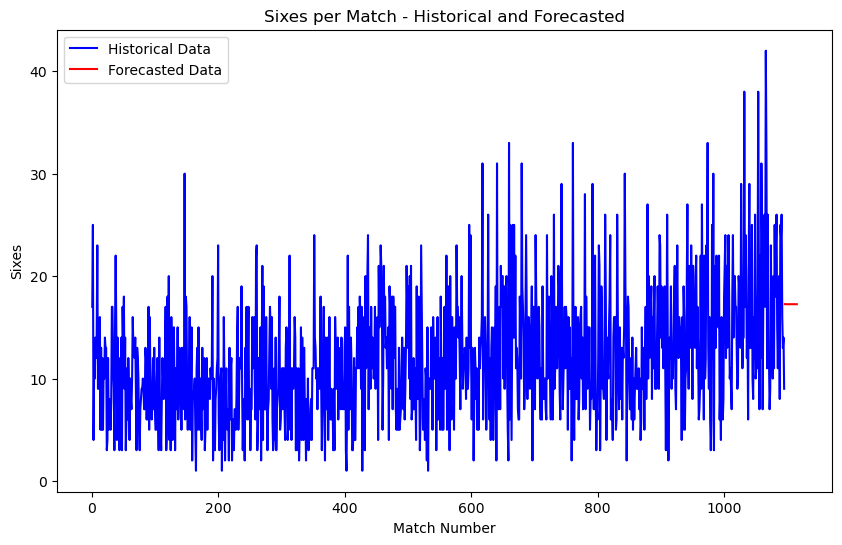

1095    17.261602
1096    17.254800
1097    17.254806
1098    17.254805
1099    17.254805
1100    17.254805
1101    17.254805
1102    17.254805
1103    17.254805
1104    17.254805
1105    17.254805
1106    17.254805
1107    17.254805
1108    17.254805
1109    17.254805
1110    17.254805
1111    17.254805
1112    17.254805
1113    17.254805
1114    17.254805
Name: predicted_mean, dtype: float64


In [14]:
df['sixes'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)

match_sixes = df.groupby('match_id')['sixes'].sum().reset_index()

match_sixes['match_number'] = range(1, len(match_sixes) + 1)
match_sixes.set_index('match_number', inplace=True)

model = ARIMA(match_sixes['sixes'], order=(1, 1, 1))
model_fit = model.fit()

forecast_steps = 20
forecast_arima = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(10, 6))
plt.plot(match_sixes['sixes'], label='Historical Data', color='blue')
plt.plot(range(len(match_sixes) + 1, len(match_sixes) + 1 + forecast_steps),
         forecast_arima, label='Forecasted Data', color='red')
plt.title('Sixes per Match - Historical and Forecasted')
plt.xlabel('Match Number')
plt.ylabel('Sixes')
plt.legend()
plt.show()

print(forecast_arima)

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


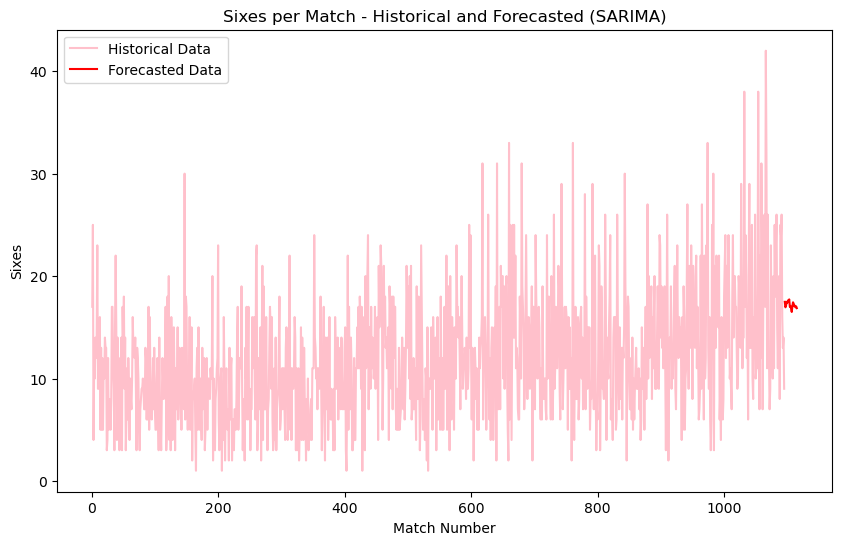

1095    17.487119
1096    16.950276
1097    17.122826
1098    17.476617
1099    17.398418
1100    17.625613
1101    17.494009
1102    17.728112
1103    16.999978
1104    17.084142
1105    16.820148
1106    16.500332
1107    17.047429
1108    17.440256
1109    17.314238
1110    17.055854
1111    17.112964
1112    16.947037
1113    17.043152
1114    16.872179
Name: predicted_mean, dtype: float64


In [50]:
df['sixes'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)

match_sixes = df.groupby('match_id')['sixes'].sum().reset_index()

match_sixes['match_number'] = range(1, len(match_sixes) + 1)
match_sixes.set_index('match_number', inplace=True)

model = SARIMAX(match_sixes['sixes'], order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))
model_fit = model.fit(disp=False)

forecast_steps = 20
forecast_sarima = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(10, 6))
plt.plot(match_sixes['sixes'], label='Historical Data', color='pink')
plt.plot(range(len(match_sixes) + 1, len(match_sixes) + 1 + forecast_steps),
         forecast_sarima, label='Forecasted Data', color='red')
plt.title('Sixes per Match - Historical and Forecasted (SARIMA)')
plt.xlabel('Match Number')
plt.ylabel('Sixes')
plt.legend()
plt.show()

print(forecast_sarima)

## Evaluation ARIMA model

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
train_size = int(len(match_sixes) * 0.8)
train, test = match_sixes['sixes'][:train_size], match_sixes['sixes'][train_size:]

# Fit the ARIMA model on the training set
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.forecast(steps=len(test))

# Calculate evaluation metrics
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Akaike Information Criterion (AIC):", model_fit.aic)
print("Bayesian Information Criterion (BIC):", model_fit.bic)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Mean Absolute Error (MAE): 6.231365118433364
Mean Squared Error (MSE): 67.57620797049844
Root Mean Squared Error (RMSE): 8.220474923658514
Akaike Information Criterion (AIC): 5439.728198817285
Bayesian Information Criterion (BIC): 5454.050870476358


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


## Evaluation SARIMA model

In [21]:
train_size = int(len(match_sixes) * 0.8)
train, test = match_sixes['sixes'][:train_size], match_sixes['sixes'][train_size:]

# Fit the SARIMA model on the training set
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))
model_fit = model.fit(disp=False)

# Make predictions on the test set
predictions = model_fit.forecast(steps=len(test))

# Calculate evaluation metrics
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Akaike Information Criterion (AIC):", model_fit.aic)
print("Bayesian Information Criterion (BIC):", model_fit.bic)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Mean Absolute Error (MAE): 6.240413076494761
Mean Squared Error (MSE): 67.69952794548784
Root Mean Squared Error (RMSE): 8.22797228638307
Akaike Information Criterion (AIC): 5440.849231346677
Bayesian Information Criterion (BIC): 5464.720350778465


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

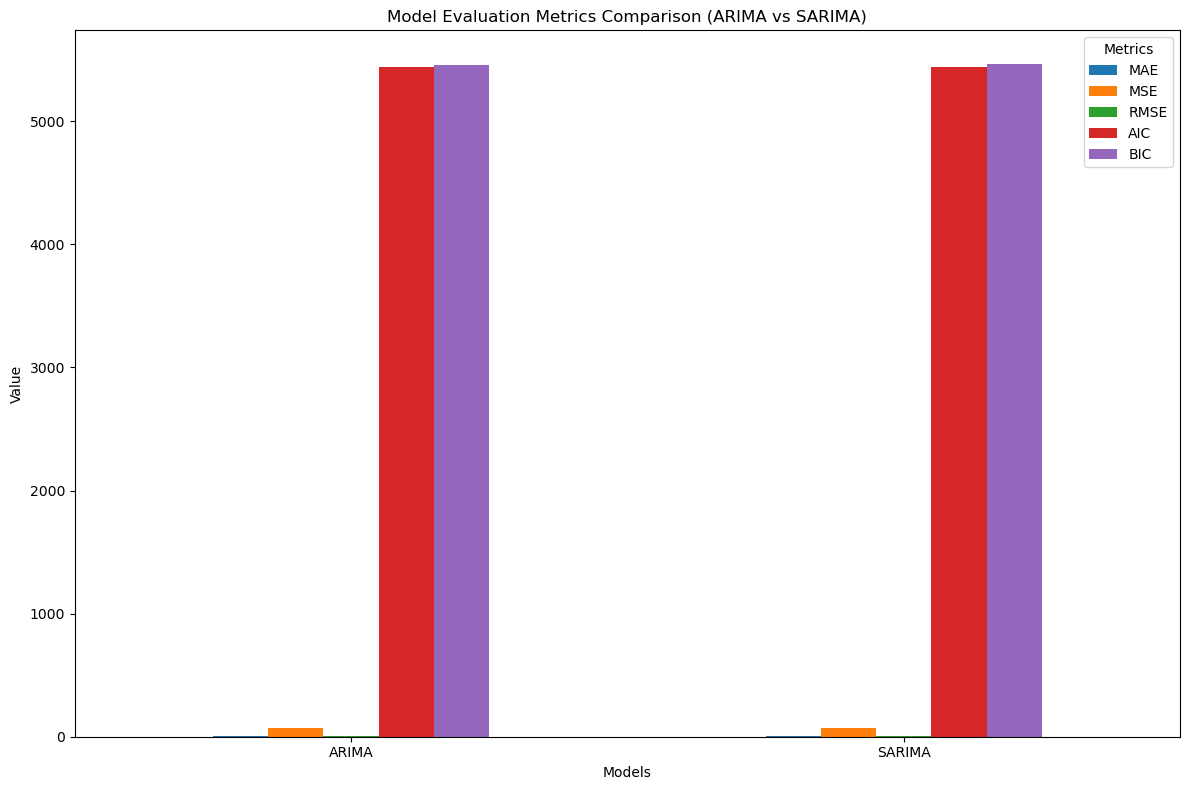

In [22]:
train_size = int(len(match_sixes) * 0.8)
train, test = match_sixes['sixes'][:train_size], match_sixes['sixes'][train_size:]

# ARIMA Model
arima_model = ARIMA(train, order=(1, 1, 1))
arima_model_fit = arima_model.fit()

# SARIMA Model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))
sarima_model_fit = sarima_model.fit(disp=False)

# ARIMA Predictions
arima_predictions = arima_model_fit.forecast(steps=len(test))

# SARIMA Predictions
sarima_predictions = sarima_model_fit.forecast(steps=len(test))

# Calculate Evaluation Metrics for ARIMA
arima_mae = mean_absolute_error(test, arima_predictions)
arima_mse = mean_squared_error(test, arima_predictions)
arima_rmse = np.sqrt(arima_mse)
arima_aic = arima_model_fit.aic
arima_bic = arima_model_fit.bic

# Calculate Evaluation Metrics for SARIMA
sarima_mae = mean_absolute_error(test, sarima_predictions)
sarima_mse = mean_squared_error(test, sarima_predictions)
sarima_rmse = np.sqrt(sarima_mse)
sarima_aic = sarima_model_fit.aic
sarima_bic = sarima_model_fit.bic

# Create a DataFrame for easier plotting
metrics = pd.DataFrame({
    'MAE': [arima_mae, sarima_mae],
    'MSE': [arima_mse, sarima_mse],
    'RMSE': [arima_rmse, sarima_rmse],
    'AIC': [arima_aic, sarima_aic],
    'BIC': [arima_bic, sarima_bic]
}, index=['ARIMA', 'SARIMA'])

# Plot the evaluation metrics
metrics.plot(kind='bar', figsize=(12, 8))
plt.title('Model Evaluation Metrics Comparison (ARIMA vs SARIMA)')
plt.ylabel('Value')
plt.xlabel('Models')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

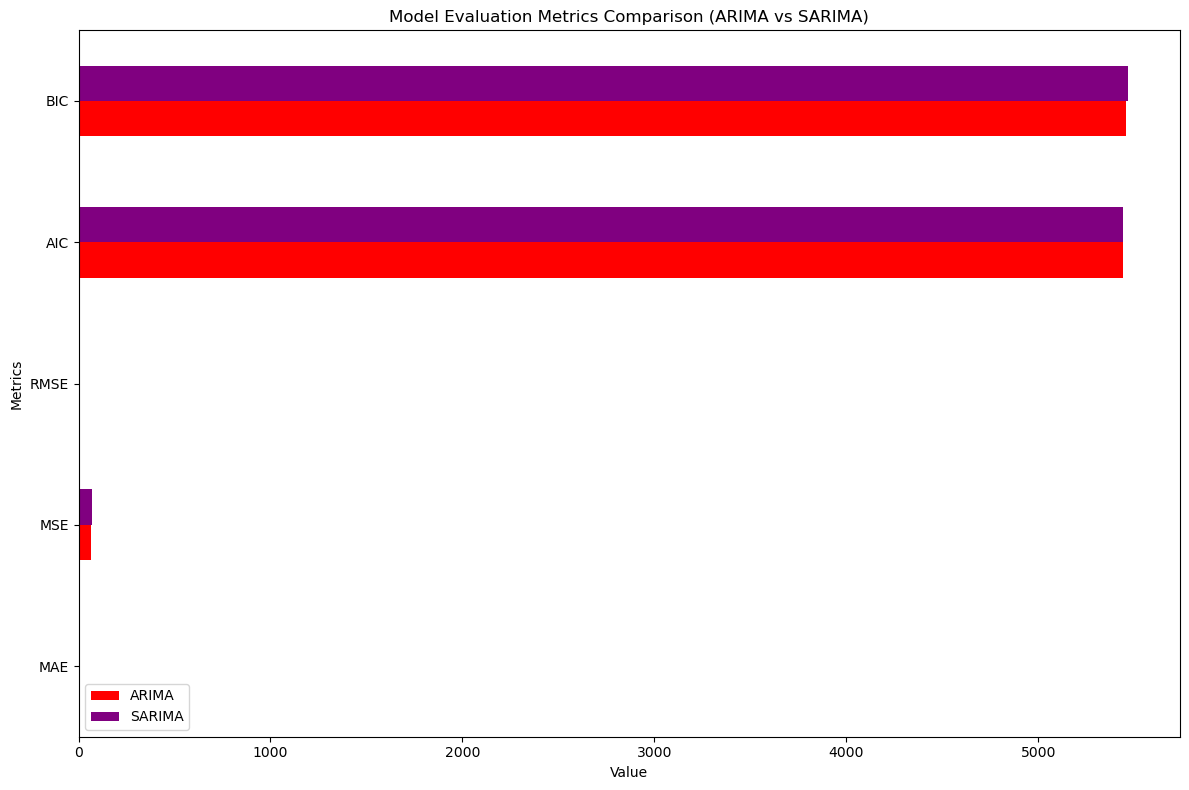

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split data into training and testing sets
train_size = int(len(match_sixes) * 0.8)
train, test = match_sixes['sixes'][:train_size], match_sixes['sixes'][train_size:]

# ARIMA Model
arima_model = ARIMA(train, order=(1, 1, 1))
arima_model_fit = arima_model.fit()

# SARIMA Model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))
sarima_model_fit = sarima_model.fit(disp=False)

# ARIMA Predictions
arima_predictions = arima_model_fit.forecast(steps=len(test))

# SARIMA Predictions
sarima_predictions = sarima_model_fit.forecast(steps=len(test))

# Calculate Evaluation Metrics for ARIMA
arima_mae = mean_absolute_error(test, arima_predictions)
arima_mse = mean_squared_error(test, arima_predictions)
arima_rmse = np.sqrt(arima_mse)
arima_aic = arima_model_fit.aic
arima_bic = arima_model_fit.bic

# Calculate Evaluation Metrics for SARIMA
sarima_mae = mean_absolute_error(test, sarima_predictions)
sarima_mse = mean_squared_error(test, sarima_predictions)
sarima_rmse = np.sqrt(sarima_mse)
sarima_aic = sarima_model_fit.aic
sarima_bic = sarima_model_fit.bic

# Create a DataFrame for easier plotting
metrics = pd.DataFrame({
    'ARIMA': [arima_mae, arima_mse, arima_rmse, arima_aic, arima_bic],
    'SARIMA': [sarima_mae, sarima_mse, sarima_rmse, sarima_aic, sarima_bic]
}, index=['MAE', 'MSE', 'RMSE', 'AIC', 'BIC'])

# Plot the evaluation metrics as horizontal bars
metrics.plot(kind='barh', figsize=(12, 8), color=['red', 'purple'])
plt.title('Model Evaluation Metrics Comparison (ARIMA vs SARIMA)')
plt.xlabel('Value')
plt.ylabel('Metrics')
plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

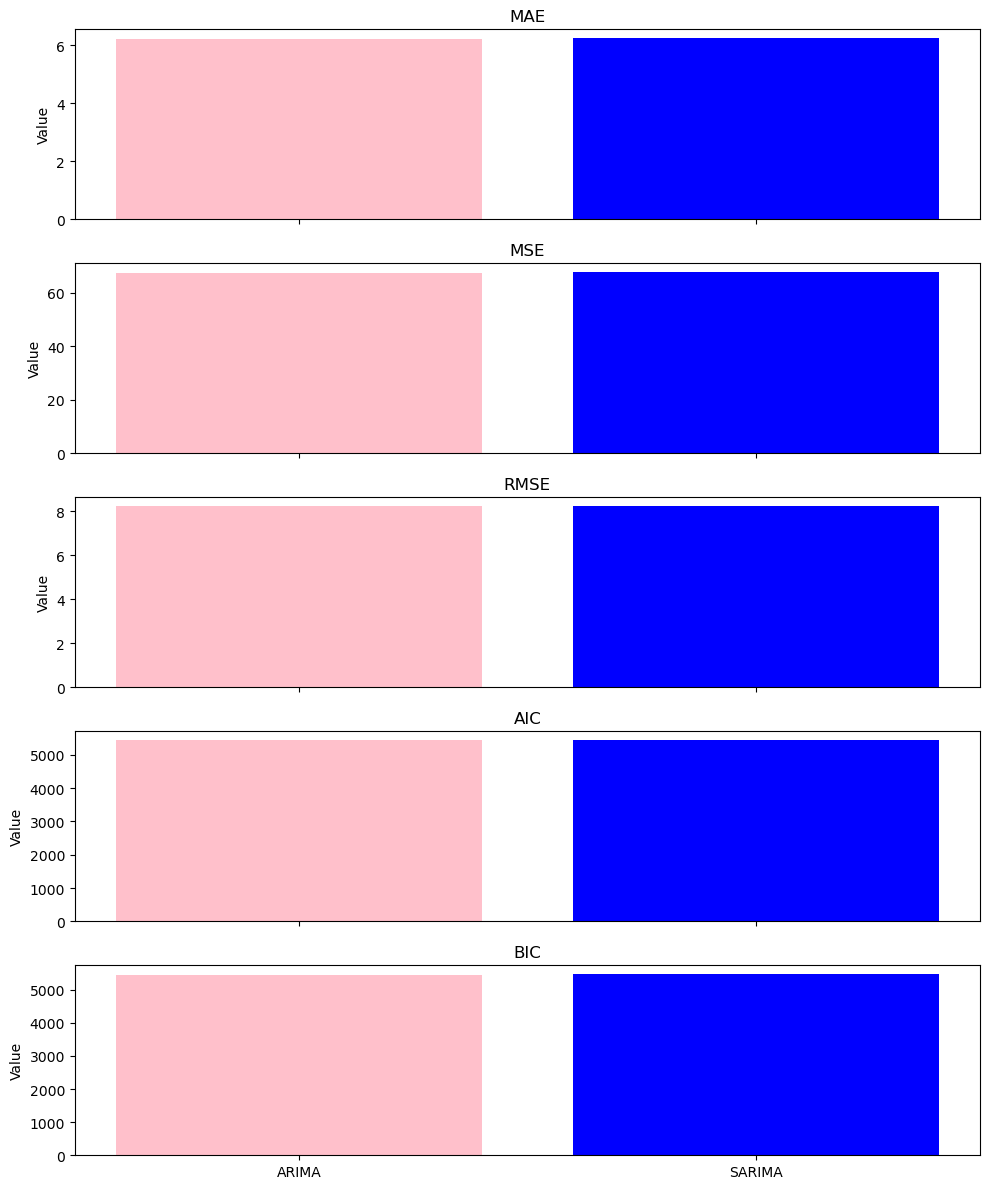

In [46]:
# Split data into training and testing sets
train_size = int(len(match_sixes) * 0.8)
train, test = match_sixes['sixes'][:train_size], match_sixes['sixes'][train_size:]

# ARIMA Model
arima_model = ARIMA(train, order=(1, 1, 1))
arima_model_fit = arima_model.fit()

# SARIMA Model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))
sarima_model_fit = sarima_model.fit(disp=False)

# ARIMA Predictions
arima_predictions = arima_model_fit.forecast(steps=len(test))

# SARIMA Predictions
sarima_predictions = sarima_model_fit.forecast(steps=len(test))

# Calculate Evaluation Metrics for ARIMA
arima_metrics = {
    'MAE': mean_absolute_error(test, arima_predictions),
    'MSE': mean_squared_error(test, arima_predictions),
    'RMSE': np.sqrt(mean_squared_error(test, arima_predictions)),
    'AIC': arima_model_fit.aic,
    'BIC': arima_model_fit.bic,
}

# Calculate Evaluation Metrics for SARIMA
sarima_metrics = {
    'MAE': mean_absolute_error(test, sarima_predictions),
    'MSE': mean_squared_error(test, sarima_predictions),
    'RMSE': np.sqrt(mean_squared_error(test, sarima_predictions)),
    'AIC': sarima_model_fit.aic,
    'BIC': sarima_model_fit.bic,
}

# Create a DataFrame for easier plotting
metrics = pd.DataFrame({'ARIMA': arima_metrics, 'SARIMA': sarima_metrics})

# Create subplots for each metric
fig, axes = plt.subplots(5, 1, figsize=(10, 12), sharex=True)

# Metric names
metric_names = ['MAE', 'MSE', 'RMSE', 'AIC', 'BIC']

# Plot each metric as a bar plot on individual subplots
for i, metric in enumerate(metric_names):
    axes[i].bar(['ARIMA', 'SARIMA'], metrics.loc[metric], color=['pink', 'blue'])
    axes[i].set_title(metric)
    axes[i].set_ylabel('Value')

# Adjust layout
plt.tight_layout()
plt.show()
